<a href="https://colab.research.google.com/github/tejash0901/mini/blob/main/DNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.3 MB/s eta 0:00:00


In [3]:
from Bio import SeqIO
import numpy as np
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split

In [7]:
classesDict = {0: "MERS", 1: "SARS"}
attributes = np.array([])
classes = np.array([])

In [8]:
for key in classesDict:
    fasta_sequences = SeqIO.parse(open("/content/drive/MyDrive/data/sequences"+classesDict[key]+".fasta"), 'fasta')
    attrsSize = attributes.shape[0]           
    attributes = np.concatenate ((attributes, np.array([str(fasta.seq) for fasta in fasta_sequences])))
    classSize = attributes.shape[0] - attrsSize
    currentClass = np.empty(classSize)
    currentClass.fill(key)
    classes = np.concatenate ((classes, currentClass))
    print("class ", classesDict[key], " size: ", currentClass.shape[0])
        
print("total attributes size before oversampling: ", attributes.shape[0])
print("total classes size before oversampling: ", classes.shape[0])


class  MERS  size:  1453
class  SARS  size:  674
total attributes size before oversampling:  2127
total classes size before oversampling:  2127


In [ ]:
attributes = np.array(attributes)
classes = np.array(classes)

print("total attributes size before oversampling:", attributes.shape[0])
print("total classes size before oversampling:", classes.shape[0])

total attributes size before oversampling: 2127
total classes size before oversampling: 2127


In [10]:
attributes = attributes.reshape(-1,1)
oversampling_classes = {1 : 1500}
sampler = SMOTEN(sampling_strategy=oversampling_classes, random_state=0)
X_res, y_res = sampler.fit_resample(attributes, classes)
        
maxSequence = 3000

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1500) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 1453)
  warnings.warn(


In [ ]:
# import numpy as np

# # Define the mapping between bases and their positions
# base_mapping = {'a': 0, 'c': 1, 'g': 2, 't': 3 , 'n' : 4}

# # Initialize an empty array to store the one-hot encoded sequences
# X_res_encoded = np.zeros((len(X_res), len(X_res[0]), 5), dtype=np.uint8)

# # Iterate over each sequence and encode it
# for i, sequence in enumerate(X_res):
#     for j, base in enumerate(sequence):
#         if base in base_mapping:
#             base_index = base_mapping[base]
#             X_res_encoded[i, j, base_index] = 1

# # Split the encoded data
# x_train, x_test, y_train, y_test = train_test_split(X_res_encoded, y_res, test_size=0.3, random_state=4, stratify=y_res)

# # Print the sizes of the train and test sets
# print("x_train size:", x_train.shape[0])
# print("y_train size:", y_train.shape[0])
# print("x_test size:", x_test.shape[0])
# print("y_test size:", y_test.shape[0])


x_train size: 10117
y_train size: 10117
x_test size: 4336
y_test size: 4336


In [11]:
X_resBinarized = np.empty((0, maxSequence), dtype=np.uint8)
for sequence in X_res:
    sequenceStr = sequence[0]
    sequenceBinarizedStr = ""
    index = 0
    for char in sequenceStr:
        if index < maxSequence:
            if char == 'a':
                sequenceBinarizedStr += "1"
            elif char == 'c':
                sequenceBinarizedStr += "2"
            elif char == 'g':
                sequenceBinarizedStr += "3"
            elif char == 't':
                sequenceBinarizedStr += "4"
            else:
                sequenceBinarizedStr += "0"
        index += 1
            
    if len(sequenceStr) < maxSequence:
        sequenceLength = len(sequenceStr)
        while sequenceLength < maxSequence:
            sequenceBinarizedStr += "0"
            sequenceLength += 1
        
    sequenceBinarized = np.array(list(sequenceBinarizedStr), dtype=np.uint8)
    X_resBinarized = np.append(X_resBinarized, [sequenceBinarized], axis=0)
        
    

x_train, x_test, y_train, y_test = train_test_split(X_resBinarized, y_res, test_size=0.3, random_state=4, stratify=y_res)
    
print("x_train size: ", x_train.shape[0])
print("y_train size: ", y_train.shape[0])
print("x_test size: ", x_test.shape[0])
print("y_test size: ", y_test.shape[0])

x_train size:  2067
y_train size:  2067
x_test size:  886
y_test size:  886


In [12]:

x_train

array([[4, 2, 4, ..., 0, 0, 0],
       [4, 3, 2, ..., 0, 0, 0],
       [1, 4, 3, ..., 1, 1, 3],
       ...,
       [2, 3, 4, ..., 0, 0, 0],
       [3, 1, 4, ..., 1, 3, 4],
       [1, 4, 3, ..., 1, 4, 2]], dtype=uint8)

In [13]:
print(x_test)

[[3 1 4 ... 1 3 4]
 [1 4 3 ... 1 1 3]
 [1 4 3 ... 1 4 2]
 ...
 [3 1 4 ... 1 3 4]
 [4 3 4 ... 0 0 0]
 [1 4 3 ... 1 4 2]]


In [14]:
import tensorflow as tf
from tensorflow import keras
import sklearn.metrics as metrics
import numpy as np

In [15]:
batch_size = 32
num_classes = 5
epochs = 3


In [16]:
vocab_size = 5
embedding_dim = 8
maxlen= x_train[0].size

In [17]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
y_test1 = np.argmax(y_test,axis=1)
y_train1 = np.argmax(y_train,axis=1)

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, LSTM

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, 2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))  # Recurrent layer (LSTM)
model.add(Conv1D(64, 2, activation='relu'))  # Additional Conv1D layer after LSTM
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3000, 8)           40        
                                                                 
 conv1d (Conv1D)             (None, 2999, 128)         2176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1499, 128)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1498, 64)          16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 749, 64)          0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 749, 64)           3

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [22]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/3
65/65 [==============================] - 99s 1s/step - loss: 0.7983 - accuracy: 0.4910 - val_loss: 0.9867 - val_accuracy: 0.5079
Epoch 2/3
65/65 [==============================] - 87s 1s/step - loss: 0.3422 - accuracy: 0.8389 - val_loss: 0.2569 - val_accuracy: 0.8973
Epoch 3/3
65/65 [==============================] - 84s 1s/step - loss: 0.1960 - accuracy: 0.9042 - val_loss: 0.1393 - val_accuracy: 0.9334


In [23]:
y_predicted = model.predict(x_test)
print("Prediction: ", y_predicted)


28/28 [==============================] - 9s 307ms/step
Prediction:  [[9.9996680e-01 3.3109864e-05 2.5580473e-08 6.9474582e-09 4.9035389e-08]
 [9.9983573e-01 1.6397468e-04 8.2601915e-08 3.3453794e-08 1.8232755e-07]
 [1.9522235e-05 9.9998039e-01 2.5039470e-09 3.1930134e-10 2.6086142e-09]
 ...
 [9.9997044e-01 2.9604431e-05 2.2049933e-08 5.8964660e-09 4.3027075e-08]
 [5.2428037e-01 4.7492135e-01 2.3832651e-04 3.5790438e-04 2.0197469e-04]
 [1.9522235e-05 9.9998045e-01 2.5039473e-09 3.1930134e-10 2.6086140e-09]]


In [24]:
y_pred_labels = np.argmax(y_predicted, axis=1)

Confusion matrix
[[412  24]
 [ 35 415]]

Classification report
              precision    recall  f1-score   support

        Mers       0.92      0.94      0.93       436
        Sars       0.95      0.92      0.93       450

    accuracy                           0.93       886
   macro avg       0.93      0.93      0.93       886
weighted avg       0.93      0.93      0.93       886



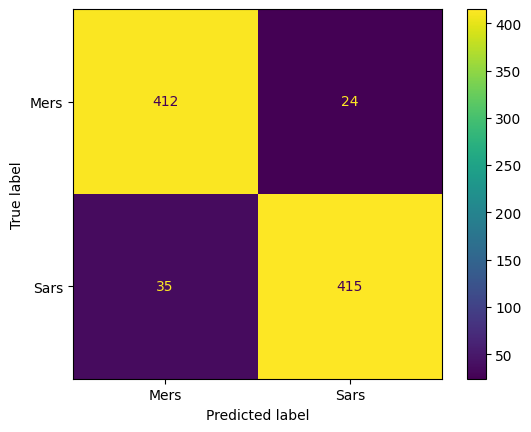

In [25]:
print("Confusion matrix")
confusion_matrix = metrics.confusion_matrix(y_true=y_test1, y_pred=y_pred_labels)
print(confusion_matrix)
target_names = ['Mers', 'Sars']
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=target_names)
disp.plot() 

print()
print("Classification report")
report = metrics.classification_report(y_test1, y_pred_labels, target_names=target_names)
print(report)
